# Classification Analysis of Purchase Behavior: Predicting Purchases Using Age and Estimated Salary

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

### Loading Dataset

In [2]:
data = pd.read_csv(r"C:\Users\Tanmayee\OneDrive\Documents\Personal\Inifinte Solutions\ID 3061\Social_Network_Ads 2.csv")
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


### Data Preprocessing 

In [3]:
data.isnull()

,Age,EstimatedSalary,Purchased
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
395,False,False,False
396,False,False,False
397,False,False,False
398,False,False,False


In [4]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
data.shape

(400, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


### Dividing into Train and Test

In [7]:
# Split the data into features (X) and target (y)
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Feature Scaling

In [8]:
# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [9]:
# Apply Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)
logreg_preds = logreg_model.predict(X_test_scaled)

### SVM

In [10]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_test_scaled)

### Model Evaluation

In [11]:
# Evaluate models
logreg_accuracy = accuracy_score(y_test, logreg_preds)
svm_accuracy = accuracy_score(y_test, svm_preds)

In [12]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("SVM Accuracy:", svm_accuracy)

Logistic Regression Accuracy: 0.85
SVM Accuracy: 0.85


In [13]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_preds))

print("SVM Classification Report:")
print(classification_report(y_test, svm_preds))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        73
           1       0.94      0.66      0.78        47

    accuracy                           0.85       120
   macro avg       0.88      0.82      0.83       120
weighted avg       0.86      0.85      0.84       120

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89        73
           1       0.97      0.64      0.77        47

    accuracy                           0.85       120
   macro avg       0.89      0.81      0.83       120
weighted avg       0.87      0.85      0.84       120



### Visualiseing Models Preformance

### Confusion Matrix

In [14]:
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [15]:
# ROC Curve
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [16]:
# Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower right")
    plt.show()

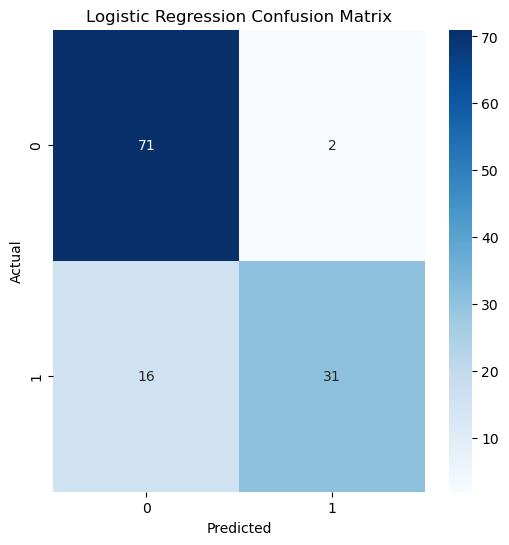

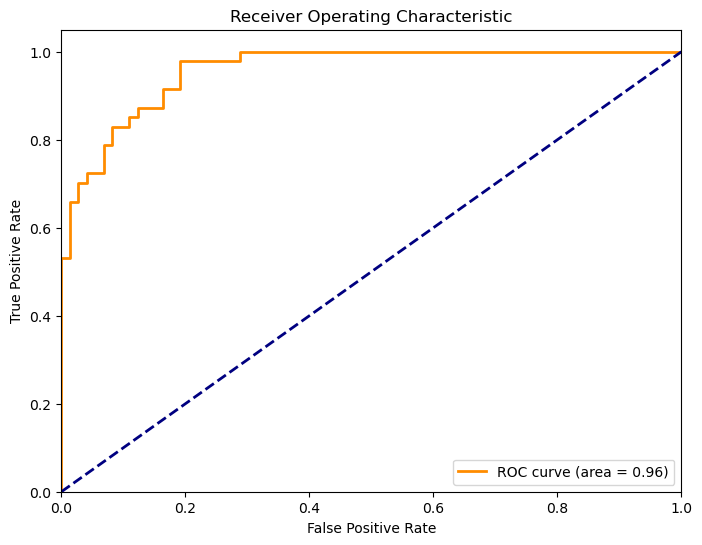

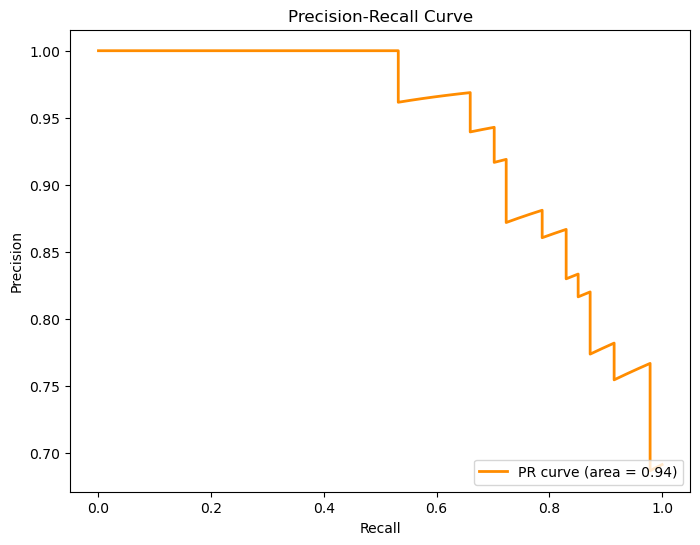

In [17]:
# Visualize Logistic Regression performance
plot_confusion_matrix(y_test, logreg_preds, title='Logistic Regression Confusion Matrix')
plot_roc_curve(y_test, logreg_model.predict_proba(X_test_scaled)[:, 1])
plot_precision_recall_curve(y_test, logreg_model.predict_proba(X_test_scaled)[:, 1])

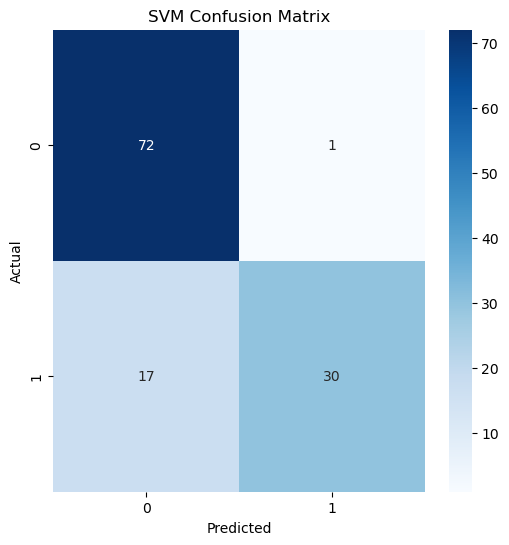

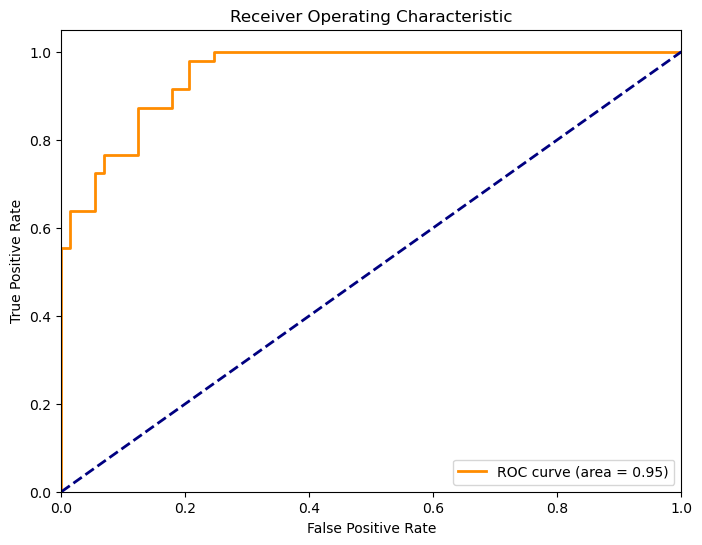

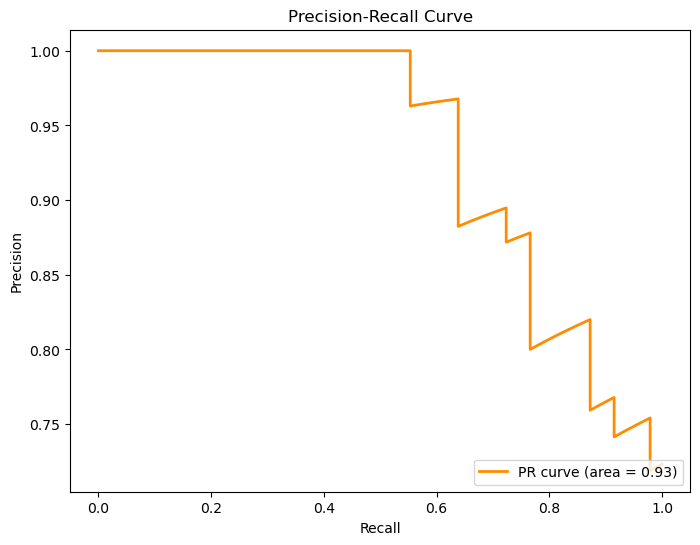

In [18]:
# Visualize SVM performance
plot_confusion_matrix(y_test, svm_preds, title='SVM Confusion Matrix')
plot_roc_curve(y_test, svm_model.decision_function(X_test_scaled))
plot_precision_recall_curve(y_test, svm_model.decision_function(X_test_scaled))